In [1]:
#Disable autosave
%autosave 0

Autosave disabled


In [2]:
# IMPORTS REQUIRED:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams["font.size"] = 8

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">



# Working with Time Series Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

```pip install vega_datasets```

In [3]:
# You can use this library like so:
from vega_datasets import data
# Call the sf_temps() dataset from the vega_datasets library like so:
temps = data.sf_temps()
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
# Ensure dtype is datetime64[ns] 
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
# Check for missing data
temps.isnull().sum()

temp    0
date    0
dtype: int64

In [6]:
temps.columns

Index(['temp', 'date'], dtype='object')

## Use the above dataset for the following exercises:

<div class="alert alert-warning">


## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [7]:
# Resample by the Day BEFORE RESET INDEX
temps['day'] = temps.date.dt.day
temps['day_of_week'] = temps.date.dt.day_name()
temps['weekday_number'] = temps.date.dt.day_of_week+1

In [8]:
#### Reset & Sort index to date
temps = temps.set_index('date').sort_index()
temps.head()

,temp,day,day_of_week,weekday_number
date,,,,
2010-01-01 00:00:00,47.8,1,Friday,5
2010-01-01 01:00:00,47.4,1,Friday,5
2010-01-01 02:00:00,46.9,1,Friday,5
2010-01-01 03:00:00,46.5,1,Friday,5
2010-01-01 04:00:00,46.0,1,Friday,5


<AxesSubplot:xlabel='date'>

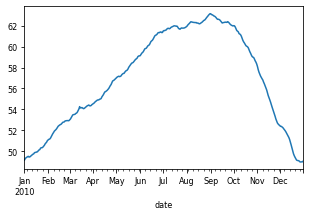

In [9]:
# Resample by Day & Plot by Temp for mean
temps.resample('D').temp.mean().plot()

<AxesSubplot:xlabel='day_of_week'>

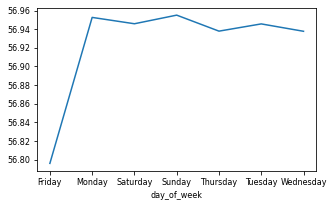

In [10]:
# Groupby Day of Week; Notice that the days are NOT in chronological order
temps.groupby('day_of_week').temp.mean().plot()

<AxesSubplot:xlabel='weekday_number'>

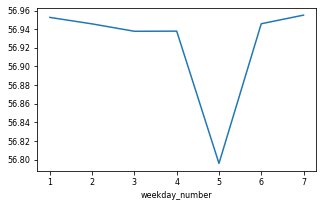

In [11]:
# Groupby Weekday Number to get a chronilogical weekday view
temps.groupby('weekday_number').temp.mean().plot()

<div class="alert alert-info">


## Observation:
* Groupby day_of_week does not place in chronological order
* Groupby weekday_number places the info in the chronoligical order that you set your column feature to
    * **Note:** the default is set to start the first entry at 0; +1 will start it at 1 since there is no zero day of the week
* Regardless of the order of data presentation, the information is still true and accurate
    * Friday is still the lowest mean day

<div class="alert alert-warning">


## 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

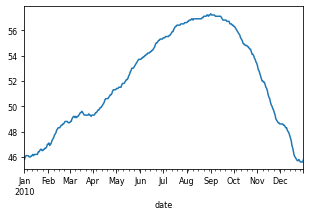

In [12]:
# Resample by Day & Plot by Temp for minimum
temps.resample('D').temp.min().plot()

<AxesSubplot:xlabel='weekday_number'>

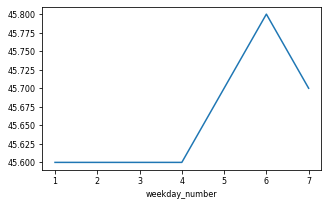

In [13]:
temps.groupby('weekday_number').temp.min().plot()

<div class="alert alert-warning">


## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

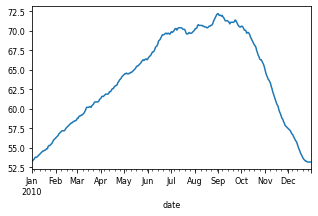

In [14]:
# Resample by Day & Plot by Temp for minimum
temps.resample('D').temp.max().plot()

<AxesSubplot:xlabel='weekday_number'>

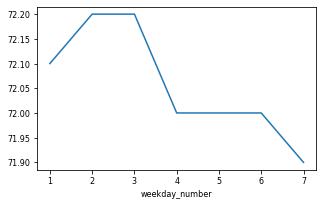

In [15]:
temps.groupby('weekday_number').temp.max().plot()

<div class="alert alert-warning">


## 4. Which month is the coldest, on average?

In [16]:
# Resample by month, look at avg temp, show min index
temps.resample('M').temp.mean().idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

<div class="alert alert-info">

    
#### ANSWER: January

<div class="alert alert-warning">


## 5. Which month has the highest average temperature?

In [17]:
# Resample by month, look at avg temp, show min index
temps.resample('M').temp.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

<div class="alert alert-info">

    
#### ANSWER: September

<div class="alert alert-warning">


## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [18]:
# Resample by day, agg by minmax of temp, and assign to new df
minmax_df = temps.resample('D').temp.agg(['min', 'max'])

In [19]:
minmax_df.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [20]:
# Calculate the variance
minmax_df['variance'] = minmax_df['max'] - minmax_df['min']
minmax_df.head()

,min,max,variance
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [21]:
# Resample by month, look at avg daily variance, show max index
minmax_df.resample('M').variance.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

<div class="alert alert-info">

    
### Which month has the highest daily temperature variability?
#### ANSWER: September

<div class="alert alert-warning">


## 7. **Bonus:** Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

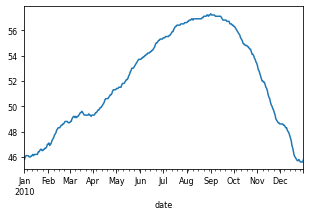

In [22]:
# Minimum
temps.resample('D').temp.min().plot()

<AxesSubplot:xlabel='date'>

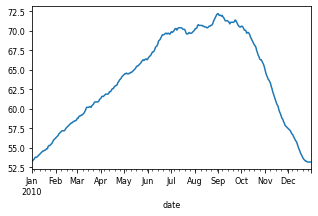

In [23]:
# Maximum
temps.resample('D').temp.max().plot()

<AxesSubplot:xlabel='date'>

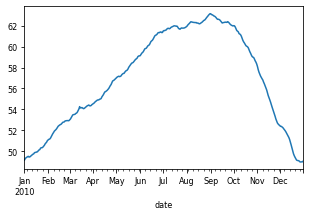

In [24]:
# Average
temps.resample('D').temp.mean().plot()

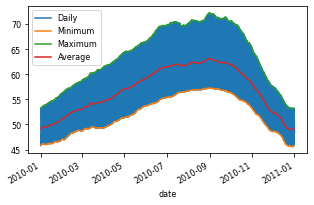

In [25]:
temps.temp.plot(label='Daily')
temps.resample('D').temp.min().plot(label='Minimum')
temps.resample('D').temp.max().plot(label='Maximum')
temps.resample('D').temp.mean().plot(label='Average')
plt.legend()
plt.show()

<div class="alert alert-success">


# ```seattle_weather``` dataset

In [26]:
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [27]:
# Ensure dtype is datetime64[ns] 
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [28]:
# Check for missing data
weather.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [29]:
weather.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [30]:
# Resample by the Day, Month, Year BEFORE RESET INDEX
weather['day'] = weather.date.dt.day
weather['day_of_week'] = weather.date.dt.day_name()
weather['weekday_number'] = weather.date.dt.day_of_week+1
weather['year'] = weather.date.dt.year
weather['month'] = weather.date.dt.month_name()
weather['month_number'] = weather.date.dt.month

In [31]:
weather.T

,0,1,2,3,4,5,6,7,8,9,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
date,2012-01-01 00:00:00,2012-01-02 00:00:00,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-07 00:00:00,2012-01-08 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,...,2015-12-22 00:00:00,2015-12-23 00:00:00,2015-12-24 00:00:00,2015-12-25 00:00:00,2015-12-26 00:00:00,2015-12-27 00:00:00,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00,2015-12-31 00:00:00
precipitation,0.0,10.9,0.8,20.3,1.3,2.5,0.0,0.0,4.3,1.0,...,4.6,6.1,2.5,5.8,0.0,8.6,1.5,0.0,0.0,0.0
temp_max,12.8,10.6,11.7,12.2,8.9,4.4,7.2,10.0,9.4,6.1,...,7.8,5.0,5.6,5.0,4.4,4.4,5.0,7.2,5.6,5.6
temp_min,5.0,2.8,7.2,5.6,2.8,2.2,2.8,2.8,5.0,0.6,...,2.8,2.8,2.2,2.2,0.0,1.7,1.7,0.6,-1.0,-2.1
wind,4.7,4.5,2.3,4.7,6.1,2.2,2.3,2.0,3.4,3.4,...,5.0,7.6,4.3,1.5,2.5,2.9,1.3,2.6,3.4,3.5
weather,drizzle,rain,rain,rain,rain,rain,rain,sun,rain,rain,...,fog,fog,fog,fog,sun,fog,fog,fog,sun,sun
day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,...,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday
weekday_number,7,1,2,3,4,5,6,7,1,2,...,2,3,4,5,6,7,1,2,3,4
year,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015


In [32]:
#### Reset & Sort index to date
weather = weather.set_index('date').sort_index()
weather.head().T

date,2012-01-01,2012-01-02,2012-01-03,2012-01-04,2012-01-05
precipitation,0.0,10.9,0.8,20.3,1.3
temp_max,12.8,10.6,11.7,12.2,8.9
temp_min,5.0,2.8,7.2,5.6,2.8
wind,4.7,4.5,2.3,4.7,6.1
weather,drizzle,rain,rain,rain,rain
day,1,2,3,4,5
day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday
weekday_number,7,1,2,3,4
year,2012,2012,2012,2012,2012
month,January,January,January,January,January


## Use the above dataset for the following exercises:

<div class="alert alert-warning">


## 1. Which year and month combination has the highest amount of precipitation?

In [33]:
# Resample by Month and Sum the Precipitation, then show index of max result
weather.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [34]:
#Use strftime to display the information in Human Readable format
weather.resample('M').precipitation.sum().idxmax().strftime('%B %Y')

'December 2015'

<div class="alert alert-info">

    
#### ANSWER: December 2015

<div class="alert alert-warning">


## 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

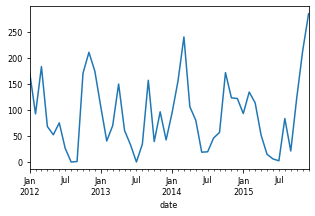

In [35]:
# Resample by Month Sum Precipitation and Plot
weather.resample('M').precipitation.sum().plot()

<div class="alert alert-warning">


## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

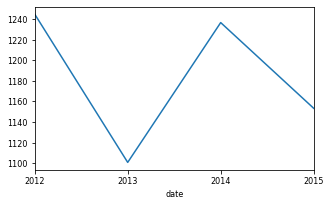

In [36]:
# Resample by Year Sum Wind and Plot
weather.resample('Y').wind.sum().plot()

<AxesSubplot:xlabel='date'>

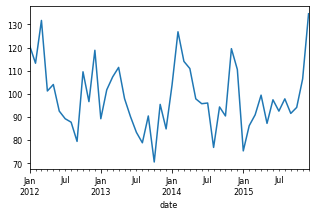

In [37]:
# Resample by Month Sum Wind and Plot
weather.resample('M').wind.sum().plot()

<AxesSubplot:xlabel='date'>

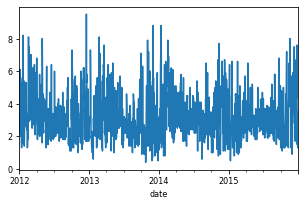

In [38]:
# Resample by Day Sum Wind and Plot
weather.resample('D').wind.sum().plot()

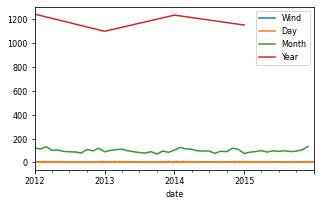

In [39]:
weather.wind.plot(label='Wind')
weather.resample('D').wind.sum().plot(label='Day')
weather.resample('M').wind.sum().plot(label='Month')
weather.resample('Y').wind.sum().plot(label='Year')
#plt.title('Wind', fontsize=20)
plt.legend()
plt.show()

<div class="alert alert-warning">


## 4. Which year-month combination is the windiest?

In [40]:
# Resample by Month Sum Wind and display max index
weather.resample('M').wind.sum().idxmax().strftime('%B %Y')

'December 2015'

<div class="alert alert-warning">


## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [41]:
# Unique value count of weather column
weather.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [42]:
# Resample by year and get Unique value count of weather column
weather.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

<div class="alert alert-info">


#### ANSWER: 2014
* but... we can automate this better...

In [43]:
# Create df with only sun
sun_df = weather[weather.weather == 'sun']

In [44]:
# Check my work
sun_df.T

date,2012-01-08,2012-01-11,2012-01-12,2012-01-13,2012-02-02,2012-02-03,2012-02-04,2012-02-05,2012-02-06,2012-02-19,...,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-12-11,2015-12-13,2015-12-14,2015-12-26,2015-12-30,2015-12-31
precipitation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,1.3,0.0,0.0,0.0,0.0
temp_max,10.0,6.1,6.1,5.0,8.3,14.4,15.6,13.9,16.1,6.7,...,7.2,9.4,9.4,7.2,9.4,7.8,7.8,4.4,5.6,5.6
temp_min,2.8,-1.1,-1.7,-2.8,1.7,2.2,5.0,1.7,1.7,2.2,...,0.0,-1.0,-1.6,-2.7,4.4,6.1,1.7,0.0,-1.0,-2.1
wind,2.0,5.1,1.9,1.3,2.6,5.3,4.3,2.9,5.0,4.7,...,5.7,4.3,3.0,1.0,2.8,6.1,1.7,2.5,3.4,3.5
weather,sun,sun,sun,sun,sun,sun,sun,sun,sun,sun,...,sun,sun,sun,sun,sun,sun,sun,sun,sun,sun
day,8,11,12,13,2,3,4,5,6,19,...,25,26,27,28,11,13,14,26,30,31
day_of_week,Sunday,Wednesday,Thursday,Friday,Thursday,Friday,Saturday,Sunday,Monday,Sunday,...,Wednesday,Thursday,Friday,Saturday,Friday,Sunday,Monday,Saturday,Wednesday,Thursday
weekday_number,7,3,4,5,4,5,6,7,1,7,...,3,4,5,6,5,7,1,6,3,4
year,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
month,January,January,January,January,February,February,February,February,February,February,...,November,November,November,November,December,December,December,December,December,December


In [45]:
# Resample by Year, count weather (which is now only sun), display max index in Human Readable format
sun_df.resample('Y').weather.count().idxmax().strftime('%Y')

'2014'

<div class="alert alert-info">


### What's the sunniest year?    
#### ANSWER: 2014

<div class="alert alert-warning">


## 6. In which month does it rain the most?

In [46]:
# Create df with only rain
rain_df = weather[weather.weather == 'rain']
rain_df.T

date,2012-01-02,2012-01-03,2012-01-04,2012-01-05,2012-01-06,2012-01-07,2012-01-09,2012-01-10,2012-01-21,2012-01-22,...,2013-08-09,2013-10-08,2014-07-13,2014-08-11,2014-10-11,2015-01-18,2015-04-01,2015-08-12,2015-08-14,2015-10-25
precipitation,10.9,0.8,20.3,1.3,2.5,0.0,4.3,1.0,3.0,6.1,...,0.0,6.9,0.0,0.5,7.4,21.3,5.1,7.6,30.5,8.9
temp_max,10.6,11.7,12.2,8.9,4.4,7.2,9.4,6.1,8.3,6.7,...,28.3,13.9,29.4,35.6,18.3,13.9,12.8,28.3,18.3,19.4
temp_min,2.8,7.2,5.6,2.8,2.2,2.8,5.0,0.6,3.3,2.2,...,14.4,7.8,15.0,17.8,11.7,7.2,5.6,16.7,15.0,8.9
wind,4.5,2.3,4.7,6.1,2.2,2.3,3.4,3.4,8.2,4.8,...,2.1,3.0,2.6,2.6,3.5,6.6,3.2,2.7,5.2,3.4
weather,rain,rain,rain,rain,rain,rain,rain,rain,rain,rain,...,rain,rain,rain,rain,rain,rain,rain,rain,rain,rain
day,2,3,4,5,6,7,9,10,21,22,...,9,8,13,11,11,18,1,12,14,25
day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Monday,Tuesday,Saturday,Sunday,...,Friday,Tuesday,Sunday,Monday,Saturday,Sunday,Wednesday,Wednesday,Friday,Sunday
weekday_number,1,2,3,4,5,6,1,2,6,7,...,5,2,7,1,6,7,3,3,5,7
year,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,...,2013,2013,2014,2014,2014,2015,2015,2015,2015,2015
month,January,January,January,January,January,January,January,January,January,January,...,August,October,July,August,October,January,April,August,August,October


In [47]:
# Measure precipitation of Rain days resampled by month
rain_df.resample('M').precipitation.sum()

date
2012-01-31    104.8
2012-02-29     86.6
2012-03-31    120.5
2012-04-30     63.5
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    115.6
2013-01-31    105.4
2013-02-28     40.3
2013-03-31     61.6
2013-04-30      0.0
2013-05-31      0.0
2013-06-30      0.0
2013-07-31      0.0
2013-08-31      0.0
2013-09-30      0.0
2013-10-31      6.9
2013-11-30      0.0
2013-12-31      0.0
2014-01-31      0.0
2014-02-28      0.0
2014-03-31      0.0
2014-04-30      0.0
2014-05-31      0.0
2014-06-30      0.0
2014-07-31      0.0
2014-08-31      0.5
2014-09-30      0.0
2014-10-31      7.4
2014-11-30      0.0
2014-12-31      0.0
2015-01-31     21.3
2015-02-28      0.0
2015-03-31      0.0
2015-04-30      5.1
2015-05-31      0.0
2015-06-30      0.0
2015-07-31      0.0
2015-08-31     38.1
2015-09-30      0.0
2015-10-31      8.9
Freq: M, Name: precipitation, dtype: float64

In [48]:
# Group by the month number and take the average precipitation
rain_df.groupby('month_number').precipitation.sum()

month_number
1     231.5
2     126.9
3     182.1
4      68.6
5      52.2
6      75.1
7      26.3
8      38.6
9       0.9
10    193.5
11    210.5
12    115.6
Name: precipitation, dtype: float64

In [49]:
# Group by the month and take the highest precipitation
rain_df.groupby('month').precipitation.sum().idxmax()

'January'

In [50]:
# Group by the month number and take the average precipitation
rain_df.groupby('month_number').weather.count()

month_number
1     35
2     40
3     37
4     20
5     16
6     19
7     14
8      6
9      4
10    20
11    25
12    23
Name: weather, dtype: int64

In [51]:
# Group by the month and take the highest count of rain days
rain_df.groupby('month').weather.count().idxmax()

'February'

<div class="alert alert-info">


### In which month does it rain the most?    
#### ANSWER: That depends
* **January** if you want the month with the highest precipitation of Rain days
* **February** if you want the month that had the highest count of rain days
    
**NOTE:** The exercise counted anything with precipitation as rain. That is inaccurate since snow and other non-rain days can have moisture in the air; also the database is inaccurate because there are rain days with ZERO(0) precipitation.

<div class="alert alert-warning">


## 7. Which month has the most number of days with a non-zero amount of precipitation?

In [52]:
# Create no zero precipitation DataFrame
non_zero_precipitation = weather[weather.precipitation > 0]

In [53]:
# Check that the min is not zero
non_zero_precipitation.min()

precipitation         0.3
temp_max             -1.1
temp_min             -4.3
wind                  0.5
weather           drizzle
day                     1
day_of_week        Friday
weekday_number          1
year                 2012
month               April
month_number            1
dtype: object

In [54]:
# Change name for ease of use
nzp = non_zero_precipitation

In [55]:
# Resample by Month and Look at precipitation count
nzp.resample('M').precipitation.count()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: precipitation, dtype: int64

In [56]:
# Groupby Month and Look at precipitation count
nzp.groupby('month_number').precipitation.count()

month_number
1     66
2     73
3     73
4     59
5     34
6     37
7     11
8     22
9     35
10    61
11    71
12    81
Name: precipitation, dtype: int64

In [57]:
# Resample by Month, count records, return max index in Human Readable format showing only Month
nzp.resample('M').precipitation.count().idxmax().strftime('%B')

'December'

<div class="alert alert-info">


### Which month has the most number of days with a non-zero amount of precipitation?    
#### ANSWER: December

<div class="alert alert-success">


# ```flights``` dataset

In [58]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [59]:
# Ensure dtype is datetime64[ns] 
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [60]:
# Check for missing data
flights.isnull().sum()

date           0
delay          0
distance       0
origin         0
destination    0
dtype: int64

In [61]:
# Resample by the Day, Month, Year BEFORE RESET INDEX
flights['day'] = flights.date.dt.day
flights['day_of_week'] = flights.date.dt.day_name()
flights['weekday_number'] = flights.date.dt.day_of_week+1
flights['year'] = flights.date.dt.year
flights['month'] = flights.date.dt.month_name()
flights['month_number'] = flights.date.dt.month
flights['hour'] = flights.date.dt.hour
flights['minute'] = flights.date.dt.minute

In [62]:
#### Reset & Sort index to date
flights = flights.set_index('date').sort_index()
flights.head().T

date,2001-01-01 00:01:00,2001-01-01 06:20:00,2001-01-01 06:30:00,2001-01-01 07:00:00,2001-01-01 07:00:00
delay,14,0,-8,-10,0
distance,405,491,251,361,303
origin,MCI,BNA,MDW,OAK,MSY
destination,MDW,MCI,STL,ONT,HOU
day,1,1,1,1,1
day_of_week,Monday,Monday,Monday,Monday,Monday
weekday_number,1,1,1,1,1
year,2001,2001,2001,2001,2001
month,January,January,January,January,January
month_number,1,1,1,1,1


## Use the above dataset for the following exercises:

<div class="alert alert-warning">

    
## 1. Convert any negative delays to 0.

In [63]:
# Create new ccolumn with delays less than zero converted to zero
flights['delay_conversion'] = np.where(flights['delay'] < 0, 0, flights['delay'])

In [64]:
# Check Work
flights.T

date,2001-01-01 00:01:00,2001-01-01 06:20:00,2001-01-01 06:30:00,2001-01-01 07:00:00,2001-01-01 07:00:00,2001-01-01 07:05:00,2001-01-01 07:05:00,2001-01-01 07:15:00,2001-01-01 07:15:00,2001-01-01 07:45:00,...,2001-03-31 20:05:00,2001-03-31 20:13:00,2001-03-31 20:30:00,2001-03-31 20:52:00,2001-03-31 20:57:00,2001-03-31 21:02:00,2001-03-31 21:05:00,2001-03-31 21:05:00,2001-03-31 21:30:00,2001-03-31 21:30:00
delay,14,0,-8,-10,0,-15,13,24,-25,-6,...,-12,42,-11,45,51,26,-5,-1,30,-11
distance,405,491,251,361,303,677,365,938,2106,904,...,621,174,938,487,787,303,318,451,174,495
origin,MCI,BNA,MDW,OAK,MSY,LAX,JAX,MHT,BWI,RDU,...,PHX,PBI,BNA,LAS,BWI,MSY,FLL,MCI,TPA,BWI
destination,MDW,MCI,STL,ONT,HOU,ABQ,BHM,BNA,LAS,MCI,...,SJC,TPA,MHT,ABQ,MCO,HOU,JAX,IND,PBI,SDF
day,1,1,1,1,1,1,1,1,1,1,...,31,31,31,31,31,31,31,31,31,31
day_of_week,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,Monday,...,Saturday,Saturday,Saturday,Saturday,Saturday,Saturday,Saturday,Saturday,Saturday,Saturday
weekday_number,1,1,1,1,1,1,1,1,1,1,...,6,6,6,6,6,6,6,6,6,6
year,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,...,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001
month,January,January,January,January,January,January,January,January,January,January,...,March,March,March,March,March,March,March,March,March,March
month_number,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3


In [81]:
# Check only 24 hours in day
flights.hour.unique()

array([ 0,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22,  3,  5, 23,  1])

<div class="alert alert-warning">

    
## 2. Which hour of the day has the highest average delay?

In [85]:
# Resample by Hour, average the delay, return max index and display Hour
flights.resample('H').delay_conversion.mean().idxmax().strftime('%H hour of the day has the highest average delay')

'03 hour of the day has the highest average delay'

<div class="alert alert-warning">

    
## 3. Does the day of the week make a difference in the delay amount?

In [92]:
# Groupby weekday number, average delay, displays in numerical order starting with MON as 1
flights.groupby('weekday_number').delay_conversion.mean()

weekday_number
1     7.165772
2     9.410866
3    11.032478
4    12.821322
5    17.757596
6     8.431498
7    10.413542
Name: delay_conversion, dtype: float64

In [91]:
# Groupby day, average delay, show max index to get groupby day
flights.groupby('day_of_week').delay_conversion.mean().idxmax()

'Friday'

In [93]:
# Use resample to allow string of time method to display day from max index with custom statement for clean answer 
flights.resample('D').delay_conversion.mean().idxmax().strftime('%A has significantly longer delays than the rest of the week')

'Friday has significantly longer delays than the rest of the week'

<div class="alert alert-warning">

    
## 4. Does the month make a difference in the delay amount?

In [96]:
# Groupby Month number, average delay, displays in numerical order starting with JAN as 1
flights.groupby('month_number').delay_conversion.mean()

month_number
1    11.301592
2    12.306106
3     9.875287
Name: delay_conversion, dtype: float64

In [98]:
# Use resample to allow string of time method to display day from max index with custom statement for clean answer 
flights.resample('M').delay_conversion.mean().idxmax().strftime('%B has longer delays than the rest of the year')

'February has longer delays than the rest of the year'

<div class="alert alert-info">


#### ANSWER: February
* Only three months of the year are displaying delays; FEB, MAR, APR
* Although FEB only shows a slightly higher delay it has fewer days which carries weight and may need to be evaluated further

<div class="alert alert-danger">

    
# Bonus

<div class="alert alert-success">


# ```iowa``` dataset

In [99]:
iowa = data.iowa_electricity()
iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [100]:
# Ensure dtype is datetime64[ns] 
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [101]:
# Check for missing data
iowa.isnull().sum()

year              0
source            0
net_generation    0
dtype: int64

In [102]:
iowa.year.unique()

array(['2001-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [104]:
# Resample by the Day, Month, Year BEFORE RESET INDEX
iowa['year'] = iowa.year.dt.year

In [105]:
iowa.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,Fossil Fuels,...,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables,Renewables
net_generation,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,...,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


Use the above dataset for the following exercises:

1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
* How would you control for increasing consumption over time when considering how much energy is coming from each source?
* express each number as a % of the year's total

<div class="alert alert-success">


# ```temps``` dataset

1. Use the sf_temps dataset

In [106]:
temps.head()

,temp,day,day_of_week,weekday_number
date,,,,
2010-01-01 00:00:00,47.8,1,Friday,5
2010-01-01 01:00:00,47.4,1,Friday,5
2010-01-01 02:00:00,46.9,1,Friday,5
2010-01-01 03:00:00,46.5,1,Friday,5
2010-01-01 04:00:00,46.0,1,Friday,5


2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
4. Create pretty labels for time plots
5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

<div class="alert alert-success">


# ```birdstrikes``` dataset

Explore the birdstrikes dataset.

In [107]:
df = data.birdstrikes()

In [109]:
df.head().T

,0,1,2,3,4
Airport__Name,BARKSDALE AIR FORCE BASE ARPT,BARKSDALE AIR FORCE BASE ARPT,BARKSDALE AIR FORCE BASE ARPT,NEW ORLEANS INTL,BARKSDALE AIR FORCE BASE ARPT
Aircraft__Make_Model,T-38A,KC-10A,B-52,B-737-300,KC-10A
Effect__Amount_of_damage,None,None,None,Substantial,None
Flight_Date,1/8/90 0:00,1/9/90 0:00,1/11/90 0:00,1/11/90 0:00,1/12/90 0:00
Aircraft__Airline_Operator,MILITARY,MILITARY,MILITARY,SOUTHWEST AIRLINES,MILITARY
Origin_State,Louisiana,Louisiana,Louisiana,Louisiana,Louisiana
When__Phase_of_flight,Climb,Approach,Take-off run,Take-off run,Climb
Wildlife__Size,Large,Medium,Medium,Small,Medium
Wildlife__Species,Turkey vulture,Unknown bird or bat,Unknown bird or bat,Rock pigeon,Unknown bird or bat
When__Time_of_day,Day,Night,Day,Day,Day


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airport__Name               10000 non-null  object 
 1   Aircraft__Make_Model        10000 non-null  object 
 2   Effect__Amount_of_damage    10000 non-null  object 
 3   Flight_Date                 10000 non-null  object 
 4   Aircraft__Airline_Operator  10000 non-null  object 
 5   Origin_State                10000 non-null  object 
 6   When__Phase_of_flight       10000 non-null  object 
 7   Wildlife__Size              10000 non-null  object 
 8   Wildlife__Species           10000 non-null  object 
 9   When__Time_of_day           10000 non-null  object 
 10  Cost__Other                 10000 non-null  int64  
 11  Cost__Repair                10000 non-null  int64  
 12  Cost__Total_$               10000 non-null  int64  
 13  Speed_IAS_in_knots          7164

<div class="alert alert-info">


# Initial Observations:
* Change ```Flight_Date``` dtype to ```datetime64```
* Handle Nulls in ```Speed_IAS_in_knots```
* May need to create binary categorical features using dummies to pivot data for dtype ```object``` columns

```quit()```... |